In [1]:
import pandas as pd
import numpy as np
from valentine import valentine_match
from valentine.algorithms import Coma
import missingno as msno
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df1 = pd.read_csv('../datasets/processed/vehicles_processed.csv')
df2 = pd.read_csv('../datasets/processed/used_cars_data_processed.csv')

/tmp/ipykernel_43701/3267167465.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('../datasets/processed/used_cars_data_processed.csv')


In [3]:
print("Dataset 1 shape:", df1.shape)
print("Dataset 2 shape:", df2.shape)

Dataset 1 shape: (399883, 24)
Dataset 2 shape: (2855653, 57)


In [4]:
print(df1['id'].isnull().sum())
print(df2['id'].isnull().sum())

0
0


In [7]:
# Instantiate matcher and run
matcher = Coma(use_instances=True, java_xmx="16G")
matches = valentine_match(df1, df2, matcher)

display(matches)

{(('table_1', 'description'), ('table_2', 'description')): 0.70669496,
 (('table_1', 'transmission'), ('table_2', 'transmission')): 0.70363474,
 (('table_1', 'price'), ('table_2', 'price')): 0.652002,
 (('table_1', 'year'), ('table_2', 'year')): 0.65114725,
 (('table_1', 'VIN'), ('table_2', 'vin')): 0.6502242,
 (('table_1', 'type'), ('table_2', 'body_type')): 0.5605929,
 (('table_1', 'paint_color'), ('table_2', 'listing_color')): 0.5292534,
 (('table_1', 'model'), ('table_2', 'model_name')): 0.5285753,
 (('table_1', 'cylinders'), ('table_2', 'engine_cylinders')): 0.50093234,
 (('table_1', 'long'), ('table_2', 'longitude')): 0.41985145,
 (('table_1', 'manufacturer'), ('table_2', 'make_name')): 0.41466492,
 (('table_1', 'lat'), ('table_2', 'latitude')): 0.3933501,
 (('table_1', 'id'), ('table_2', 'sp_id')): 0.39108694,
 (('table_1', 'posting_date'), ('table_2', 'listed_date')): 0.372916,
 (('table_1', 'drive'), ('table_2', 'trim_name')): 0.3539588,
 (('table_1', 'title_status'), ('table_

In [8]:
# Il risultato ottenuto da COMA
coma_results = {(('table_1', 'description'), ('table_2', 'description')): 0.70669496, (('table_1', 'transmission'), ('table_2', 'transmission')): 0.70363474, (('table_1', 'price'), ('table_2', 'price')): 0.652002, (('table_1', 'year'), ('table_2', 'year')): 0.65114725, (('table_1', 'VIN'), ('table_2', 'vin')): 0.6502242, (('table_1', 'type'), ('table_2', 'body_type')): 0.5605929, (('table_1', 'paint_color'), ('table_2', 'listing_color')): 0.5292534, (('table_1', 'model'), ('table_2', 'model_name')): 0.5285753, (('table_1', 'cylinders'), ('table_2', 'engine_cylinders')): 0.50093234, (('table_1', 'long'), ('table_2', 'longitude')): 0.41985145, (('table_1', 'manufacturer'), ('table_2', 'make_name')): 0.41466492, (('table_1', 'lat'), ('table_2', 'latitude')): 0.3933501, (('table_1', 'id'), ('table_2', 'sp_id')): 0.39108694, (('table_1', 'posting_date'), ('table_2', 'listed_date')): 0.372916, (('table_1', 'drive'), ('table_2', 'trim_name')): 0.3539588, (('table_1', 'title_status'), ('table_2', 'theft_title')): 0.32001543, (('table_1', 'odometer'), ('table_2', 'power')): 0.30869272}

# 1. Estrarre le liste degli attributi coinvolti nel matching
# Nota: usiamo un set per evitare duplicati se una colonna è stata matchata più volte
cols_match_df1 = set([key[0][1] for key in coma_results.keys()])
cols_match_df2 = set([key[1][1] for key in coma_results.keys()])

# 2. Identificare le colonne rimanenti sottraendo quelle matchate dal totale
# Assumendo che df1 e df2 siano i tuoi DataFrame puliti (senza le colonne > 70% missing)
remaining_df1 = [c for c in df1.columns if c not in cols_match_df1]
remaining_df2 = [c for c in df2.columns if c not in cols_match_df2]

print(f"--- Dataset 1 (Table 1) ---")
print(f"Matchate ({len(cols_match_df1)}): {sorted(list(cols_match_df1))}")
print(f"Rimanenti ({len(remaining_df1)}): {remaining_df1}")

print(f"\n--- Dataset 2 (Table 2) ---")
print(f"Matchate ({len(cols_match_df2)}): {sorted(list(cols_match_df2))}")
print(f"Rimanenti ({len(remaining_df2)}): {remaining_df2}")

--- Dataset 1 (Table 1) ---
Matchate (17): ['VIN', 'cylinders', 'description', 'drive', 'id', 'lat', 'long', 'manufacturer', 'model', 'odometer', 'paint_color', 'posting_date', 'price', 'title_status', 'transmission', 'type', 'year']
Rimanenti (7): ['url', 'region', 'region_url', 'condition', 'fuel', 'image_url', 'state']

--- Dataset 2 (Table 2) ---
Matchate (17): ['body_type', 'description', 'engine_cylinders', 'latitude', 'listed_date', 'listing_color', 'longitude', 'make_name', 'model_name', 'power', 'price', 'sp_id', 'theft_title', 'transmission', 'trim_name', 'vin', 'year']
Rimanenti (40): ['back_legroom', 'city', 'city_fuel_economy', 'daysonmarket', 'dealer_zip', 'engine_displacement', 'engine_type', 'exterior_color', 'fleet', 'frame_damaged', 'franchise_dealer', 'franchise_make', 'front_legroom', 'fuel_tank_volume', 'fuel_type', 'has_accidents', 'height', 'highway_fuel_economy', 'horsepower', 'interior_color', 'isCab', 'is_new', 'length', 'listing_id', 'main_picture_url', 'majo

In [7]:
# Rimuoviamo dai due dataset le colonne non puramente descrittive delle entità ma piuttosto delle sorgenti 
df1_features_removed = {'url', 'region_url', 'image_url'}
df2_features_removed = {'engine_type', 'listing_id', 'main_picture_url'}

df1 = df1.drop(columns=df1_features_removed)
df2 = df2.drop(columns=df2_features_removed)

In [8]:
# Mapping delle colonne tra i due dataset per la generazione dello schema mediato
mapping_df1 = {
    'VIN': 'vin',
    'id': 'id_source_vehicles',
    'type': 'body_type',
    'paint_color': 'main_color',
    'long': 'longitude',
    'lat': 'latitude',
    'posting_date': 'pubblication_date',
    'drive': 'traction',
    'title_status': 'status',
    'odometer': 'mileage',
    'fuel': 'fuel_type',
    'region': 'location'
}

mapping_df2 = {
    'make_name': 'manufacturer',
    'model_name': 'model',
    'listing_color': 'main_color',
    'id': 'id_source_used_cars',
    'engine_cylinders': 'cylinders',
    'listed_date': 'pubblication_date',
    'wheel_system': 'traction',
    'theft_title': 'theft_status',
    'city' : 'location',
}


In [9]:
# 1. Rinomina le colonne nei dataset originali
df1_mapped = df1.rename(columns=mapping_df1)
df2_mapped = df2.rename(columns=mapping_df2)

# 2. Unione dei dataset (Stacking)
# pd.concat allineerà automaticamente le colonne con lo stesso nome
# e aggiungerà NaN dove la colonna esiste solo in uno dei due
df_mediated = pd.concat([df1_mapped, df2_mapped], ignore_index=True)

print(f"Dimensioni schema mediato: {df_mediated.shape}")

Dimensioni schema mediato: (3255536, 58)


In [10]:
df_mediated.head()

,id_source_vehicles,location,price,year,manufacturer,model,condition,cylinders,fuel_type,mileage,status,transmission,vin,traction,body_type,main_color,description,state,latitude,longitude,pubblication_date,back_legroom,city_fuel_economy,daysonmarket,dealer_zip,engine_displacement,exterior_color,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,has_accidents,height,highway_fuel_economy,horsepower,interior_color,isCab,is_new,length,major_options,maximum_seating,owner_count,power,salvage,savings_amount,seller_rating,sp_name,theft_status,torque,transmission_display,trimId,trim_name,wheel_system_display,wheelbase,width,id_source_used_cars
0,7.316815e+09,auburn,33590.0,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,pickup,white,Carvana is the safer way to buy a car During t...,al,32.590,-85.4800,2021-05-04T12:31:18-0500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.316815e+09,auburn,22590.0,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,pickup,blue,Carvana is the safer way to buy a car During t...,al,32.590,-85.4800,2021-05-04T12:31:08-0500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7.316815e+09,auburn,39590.0,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,NaN,pickup,red,Carvana is the safer way to buy a car During t...,al,32.590,-85.4800,2021-05-04T12:31:25-0500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7.316743e+09,auburn,30990.0,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,5TFRM5F17HX120972,NaN,pickup,red,Carvana is the safer way to buy a car During t...,al,32.590,-85.4800,2021-05-04T10:41:31-0500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7.316356e+09,auburn,15000.0,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,NaN,rwd,truck,black,2013 F-150 XLT V6 4 Door. Good condition. Leve...,al,32.592,-85.5189,2021-05-03T14:02:03-0500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Ripristina gli ID della Sorgente 1
df_mediated['id_source_vehicles'] = (
        pd.to_numeric(df_mediated['id_source_vehicles'], errors='coerce')
        .astype('Int64') # Passaggio intermedio per rimuovere il ".0" dei float
        .astype(str)     # Conversione finale in stringa
        .replace('<NA>', np.nan) # Gestione dei valori nulli per il fillna successivo
    )
# gli ID della Sorgente 2 sono già in formato corretto come stringhe quindi non serve alcuna trasformazione

In [12]:
df_mediated.head()

,id_source_vehicles,location,price,year,manufacturer,model,condition,cylinders,fuel_type,mileage,status,transmission,vin,traction,body_type,main_color,description,state,latitude,longitude,pubblication_date,back_legroom,city_fuel_economy,daysonmarket,dealer_zip,engine_displacement,exterior_color,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,has_accidents,height,highway_fuel_economy,horsepower,interior_color,isCab,is_new,length,major_options,maximum_seating,owner_count,power,salvage,savings_amount,seller_rating,sp_name,theft_status,torque,transmission_display,trimId,trim_name,wheel_system_display,wheelbase,width,id_source_used_cars
0,7316814884,auburn,33590.0,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,pickup,white,Carvana is the safer way to buy a car During t...,al,32.590,-85.4800,2021-05-04T12:31:18-0500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7316814758,auburn,22590.0,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,pickup,blue,Carvana is the safer way to buy a car During t...,al,32.590,-85.4800,2021-05-04T12:31:08-0500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7316814989,auburn,39590.0,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,NaN,pickup,red,Carvana is the safer way to buy a car During t...,al,32.590,-85.4800,2021-05-04T12:31:25-0500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7316743432,auburn,30990.0,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,5TFRM5F17HX120972,NaN,pickup,red,Carvana is the safer way to buy a car During t...,al,32.590,-85.4800,2021-05-04T10:41:31-0500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7316356412,auburn,15000.0,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,NaN,rwd,truck,black,2013 F-150 XLT V6 4 Door. Good condition. Leve...,al,32.592,-85.5189,2021-05-03T14:02:03-0500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


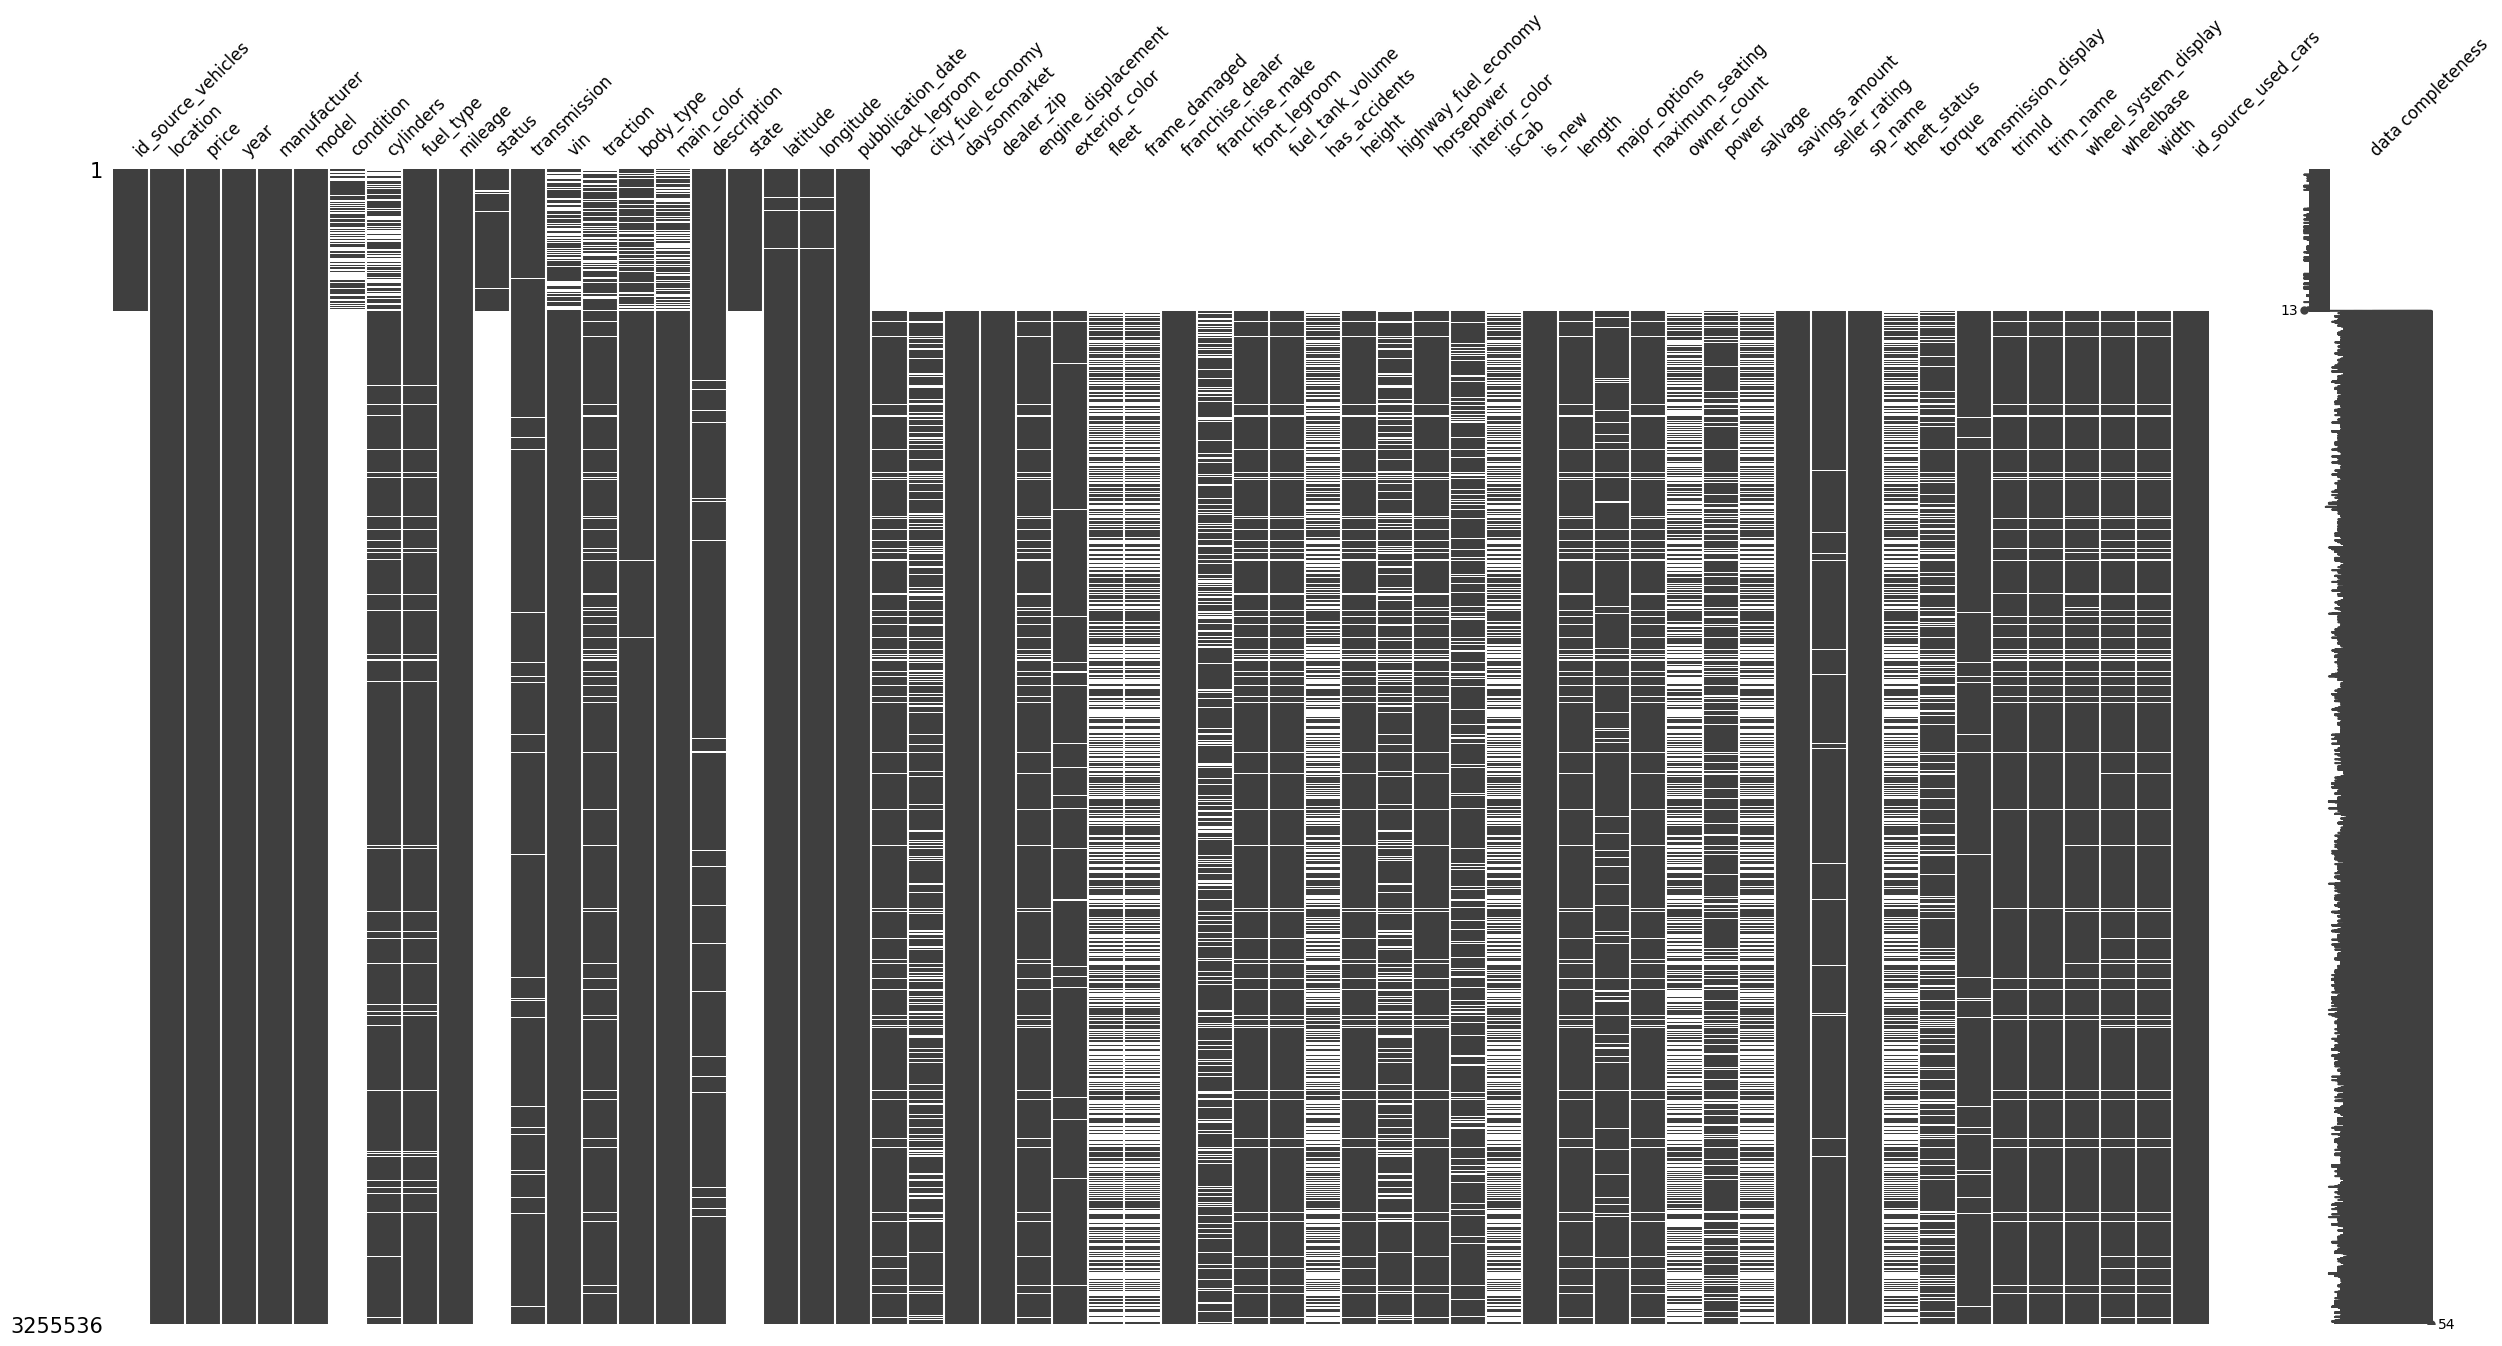

In [13]:
# Visualizzo il grafico dei missing values
msno.matrix(df_mediated, figsize=(30, 15), fontsize=12, labels=True)
plt.show()

In [14]:
# Manteniamo solo le colonne coinvolte nel matching
# Le altre colonne risulterebbero inutili per il record linkage
colonne_in_match = [
    'id_source_vehicles', 'id_source_used_cars', 'location', 'price', 'year', 'manufacturer', 'model', 'cylinders',
    'fuel_type', 'mileage', 'transmission', 'vin', 'traction', 'body_type', 'main_color', 'description', 'latitude',
    'longitude', 'pubblication_date'
]

df_mediated_cleaned = df_mediated[colonne_in_match]

df_mediated_cleaned.shape

(3255536, 19)

In [15]:
# Normalizzazione  dei record universale per Record Linkage, Dedupe e DITTO

def normalizzazione_universale(df):
    """
    Normalizza il dataset per Record Linkage, Dedupe e DITTO evitando errori su valori nulli.
    """
    df_norm = df.copy()
    
    colonne_testo = [
        'location', 'manufacturer', 'model', 'fuel_type', 
        'transmission', 'traction', 'body_type', 'main_color', 'cylinders'
    ]
    
    # Funzione di supporto per pulire il testo in modo sicuro
    def clean_text_safe(x):
        # Se il valore è nullo (NaN), None o una stringa che indica nullità, restituisci None
        if pd.isna(x) or str(x).lower() in ['nan', 'none', '']:
            return np.nan
        
        # Conversione in stringa, minuscolo e rimozione spazi esterni
        s = str(x).lower().strip()
        # Rimozione caratteri speciali (mantenendo solo alfanumerici e spazi)
        s = re.sub(r'[^a-z0-9\s]', '', s)
        # Compattazione spazi multipli
        s = re.sub(r'\s+', ' ', s).strip()
        
        # Se dopo la pulizia la stringa è vuota, meglio restituire None
        return s if s != '' else np.nan

    # Applicazione della pulizia alle colonne testuali
    for col in colonne_testo:
        if col in df_norm.columns:            
            df_norm[col] = df_norm[col].apply(clean_text_safe)

    # 2. Pulizia specifica per la colonna 'description'
    if 'description' in df_norm.columns:
        def clean_description_safe(x):
            if pd.isna(x) or str(x).lower() in ['nan', 'none', '']:
                return np.nan
            
            s = str(x).lower()
            # Rimuove URL
            s = re.sub(r'http\S+|www\S+|https\S+', '', s, flags=re.MULTILINE)
            # Rimuove caratteri speciali pesanti
            s = re.sub(r'[^a-z0-9\s]', ' ', s)
            # Compatta spazi
            s = re.sub(r'\s+', ' ', s).strip()
            return s if s != '' else np.nan

        df_norm['description'] = df_norm['description'].apply(clean_description_safe)

    # 3. Normalizzazione numerica (fondamentale per Dedupe e Record Linkage)
    colonne_numeriche = ['year', 'price', 'mileage']
    for col in colonne_numeriche:
        if col in df_norm.columns:
            df_norm[col] = pd.to_numeric(df_norm[col], errors='coerce')

    return df_norm

In [16]:
# --- APPLICAZIONE ---

# Applichiamo la normalizzazione al dataset di partenza
df_mediated_norm = normalizzazione_universale(df_mediated_cleaned)

In [17]:
df_mediated_norm.head()

,id_source_vehicles,id_source_used_cars,location,price,year,manufacturer,model,cylinders,fuel_type,mileage,transmission,vin,traction,body_type,main_color,description,latitude,longitude,pubblication_date
0,7316814884,NaN,auburn,33590.0,2014.0,gmc,sierra 1500 crew cab slt,8 cylinders,gas,57923.0,other,3GTP1VEC4EG551563,NaN,pickup,white,carvana is the safer way to buy a car during t...,32.590,-85.4800,2021-05-04T12:31:18-0500
1,7316814758,NaN,auburn,22590.0,2010.0,chevrolet,silverado 1500,8 cylinders,gas,71229.0,other,1GCSCSE06AZ123805,NaN,pickup,blue,carvana is the safer way to buy a car during t...,32.590,-85.4800,2021-05-04T12:31:08-0500
2,7316814989,NaN,auburn,39590.0,2020.0,chevrolet,silverado 1500 crew,8 cylinders,gas,19160.0,other,3GCPWCED5LG130317,NaN,pickup,red,carvana is the safer way to buy a car during t...,32.590,-85.4800,2021-05-04T12:31:25-0500
3,7316743432,NaN,auburn,30990.0,2017.0,toyota,tundra double cab sr,8 cylinders,gas,41124.0,other,5TFRM5F17HX120972,NaN,pickup,red,carvana is the safer way to buy a car during t...,32.590,-85.4800,2021-05-04T10:41:31-0500
4,7316356412,NaN,auburn,15000.0,2013.0,ford,f150 xlt,6 cylinders,gas,128000.0,automatic,NaN,rwd,truck,black,2013 f 150 xlt v6 4 door good condition leveli...,32.592,-85.5189,2021-05-03T14:02:03-0500


In [18]:
df_mediated_norm.to_csv('../datasets/mediated_schema/mediated_schema_normalized.csv', index=False) 